# Problem 1

The goal of this problem is to understand the bifurcation diagram of a discrete-time version of the logistic equation we have studied. Our *bifurcation parameter* is the rate $r$ and our map is the 
discrete time map 
$$ p \mapsto rp (1 -p)$$
or maybe more accurately $p_{n+1} = rp_n(1-p_n)$. 
(notice the similarity to the logistic differential equation). We want to give a diagram where the $x$-axis is the value of the bifurcation parameter $r$ and the $y$ axis is all points where $p_n$ can end up at as $n\to \infty$. We can restrict to values of $p$ between $0$ and $1$, and values of $r$ between $0$ and $4$. 

1. Write a function which takes a value of `r`, a starting value `p_0`, and a number `N` and returns `p_N`

       def iterate_logistic(r, p0, N):
           ...
           return pN
           
2. Write a function which takes a given value of the bifurcation parameter `r` and returns a list of `p` values that can be obtained after a very long time
  
        def attracting_values(r):
            ...
            return vals
    
   A few hints: create a list of starting values, maybe `starting_vals = [p*0.02 for p in range(1, 50)]` and then iterate each of these starting values. You can again use a list comprehension, maybe 
   `vals = [iterate_logistic(r, p0, 50) for p0 in starting_vals]`
   
3. Plot all of these points, keeping track of their $r$ and $p$ coordinates. We want to do this like how we plotted `plot_iterates` in the `2-20Demo` file, except the x and y coordinates will be $r$ and $p$ instead of `z.real()` and `z.imag()`. 

        def logistic_bifurcation():
            pts = point((0,0), size = 2)
            for r in [0.02*r for r in range(1,200)]: # iterate from 0.04 to 4 with small step size
                attracting = #  how do we find the attracting values? 
                for p in attracting:
                    pts += point(_______, size = 2) # fill in which point to add, you can also play with these values, e.g. the size of the points
             return pts
        show(logistic_bifurcation())
        
Modify the numbers and sizes of things to make something which terminates, but it can take a while regardless. Maybe change the `r in range(1,200)` to `r in range(150, 160)` or other choices to plot a small slice of the bifurcation diagram. Also check "Logistic map" on wikipedia to see if yours looks right. How does the *order* of the periodic orbit change as the value of the bifurcation parameter $r$ changes? Can you find $r$ values with a stable orbit of period 2, 4, 8, ... 3? 

## A solution

I've included a solution to the problem (with a slightly modified, but conceptually perhaps less clear method of finding the periodic orbits), with values for parameters which take a long time to run but produce a clear picture. The basic idea is that we just start with one point and find all large enough iterates of that point. What is unclear is why this gives all periodic orbits and not just one. 
I also experimented a bit and found a more efficient way to run the code, using `list_plot` and a list of tuples rather than creating a ton of `point` objects. 

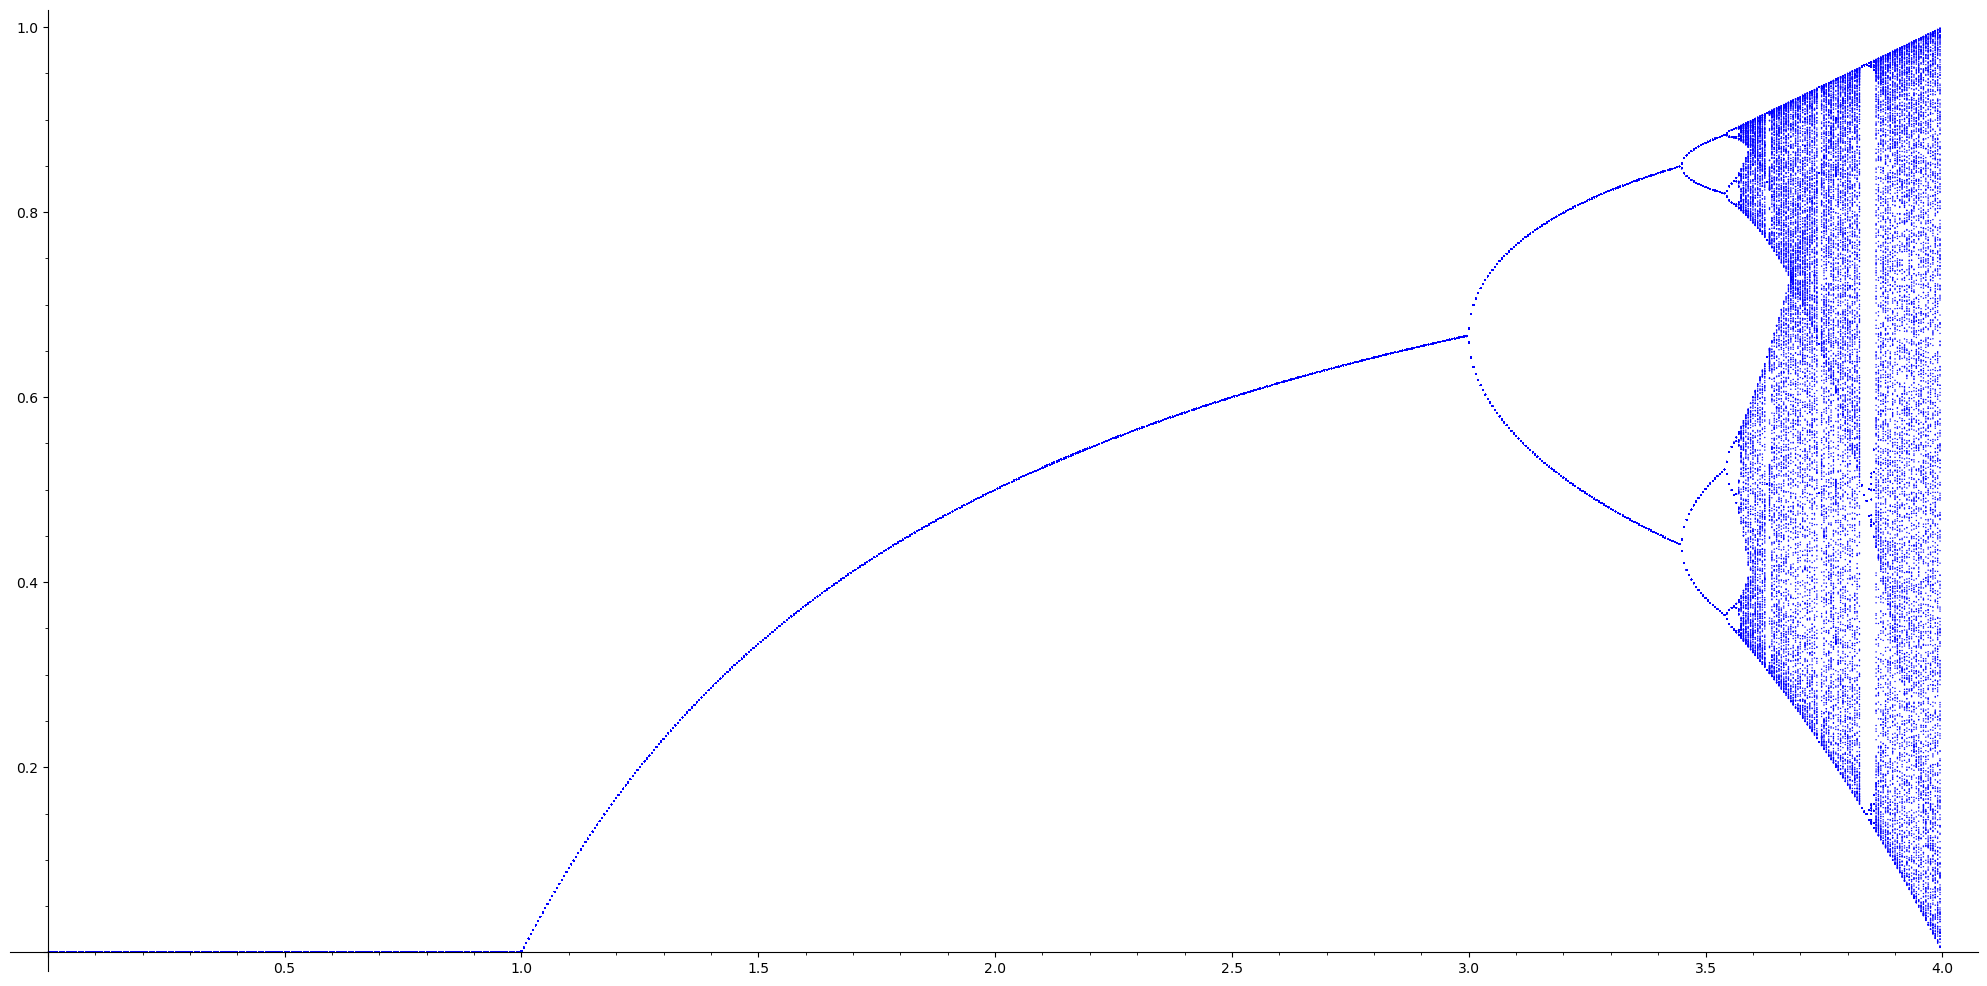

In [2]:
def logistic_iterates(r, p0, N): # this function returns a list with the for N iterates of the point p0
    def logistic_iterator_function(t): # google "python yield" if you haven't seen this before
        current_iterate = p0
        for _  in range(t):
            yield current_iterate
            current_iterate = r*current_iterate*(1- current_iterate)
    return list(logistic_iterator_function(N))

def attracting_values(r):
    return logistic_iterates(r, 0.1, 1200)[800:] # returns the elements of the list after the 200th. By this point it should have settled to a periodic orbit
    
def logistic_bifurcation():
    pts = [(0,0)] # I've found that using list_plot is actually faster than creating a bunch of point objects - we know now!
    for r in [0.005*r for r in range(1,800)]: # iterate from 0 to 4 with small step size
        attracting = attracting_values(r)
        for p in attracting:
            pts.append((r, p)) # append adds an element to the end of a list
    return pts
show(list_plot(logistic_bifurcation(), size = 1), figsize = [20,10])

Notice the pattern of bifurcations as we go from 0 to 4. The bifurcation at 1.0 looks a lot like the toy laser model we saw before. Then around 3.0 our single stable point bifurcates into a stable orbit, and each point in this orbit also bifurcates at a slightly larger value of r and as r changes the period of the orbit doubles faster and faster until we no longer have a sensible finite order periodic orbit. Remarkably, if we keep increasing r, there are small intervals $[r1, r2]$ of the bifurcation parameter where we again recover a periodic orbit - e.g. of period 3. This structure also seems to repeat itself at various scales, i.e. we see the same $2 \to 4 \to 8 \to \cdots \to \infty \to 3$ pattern repeat for each of the branches of the first bifurcation. 

We'll draw the graph one more time only focusing on the "interesting region".

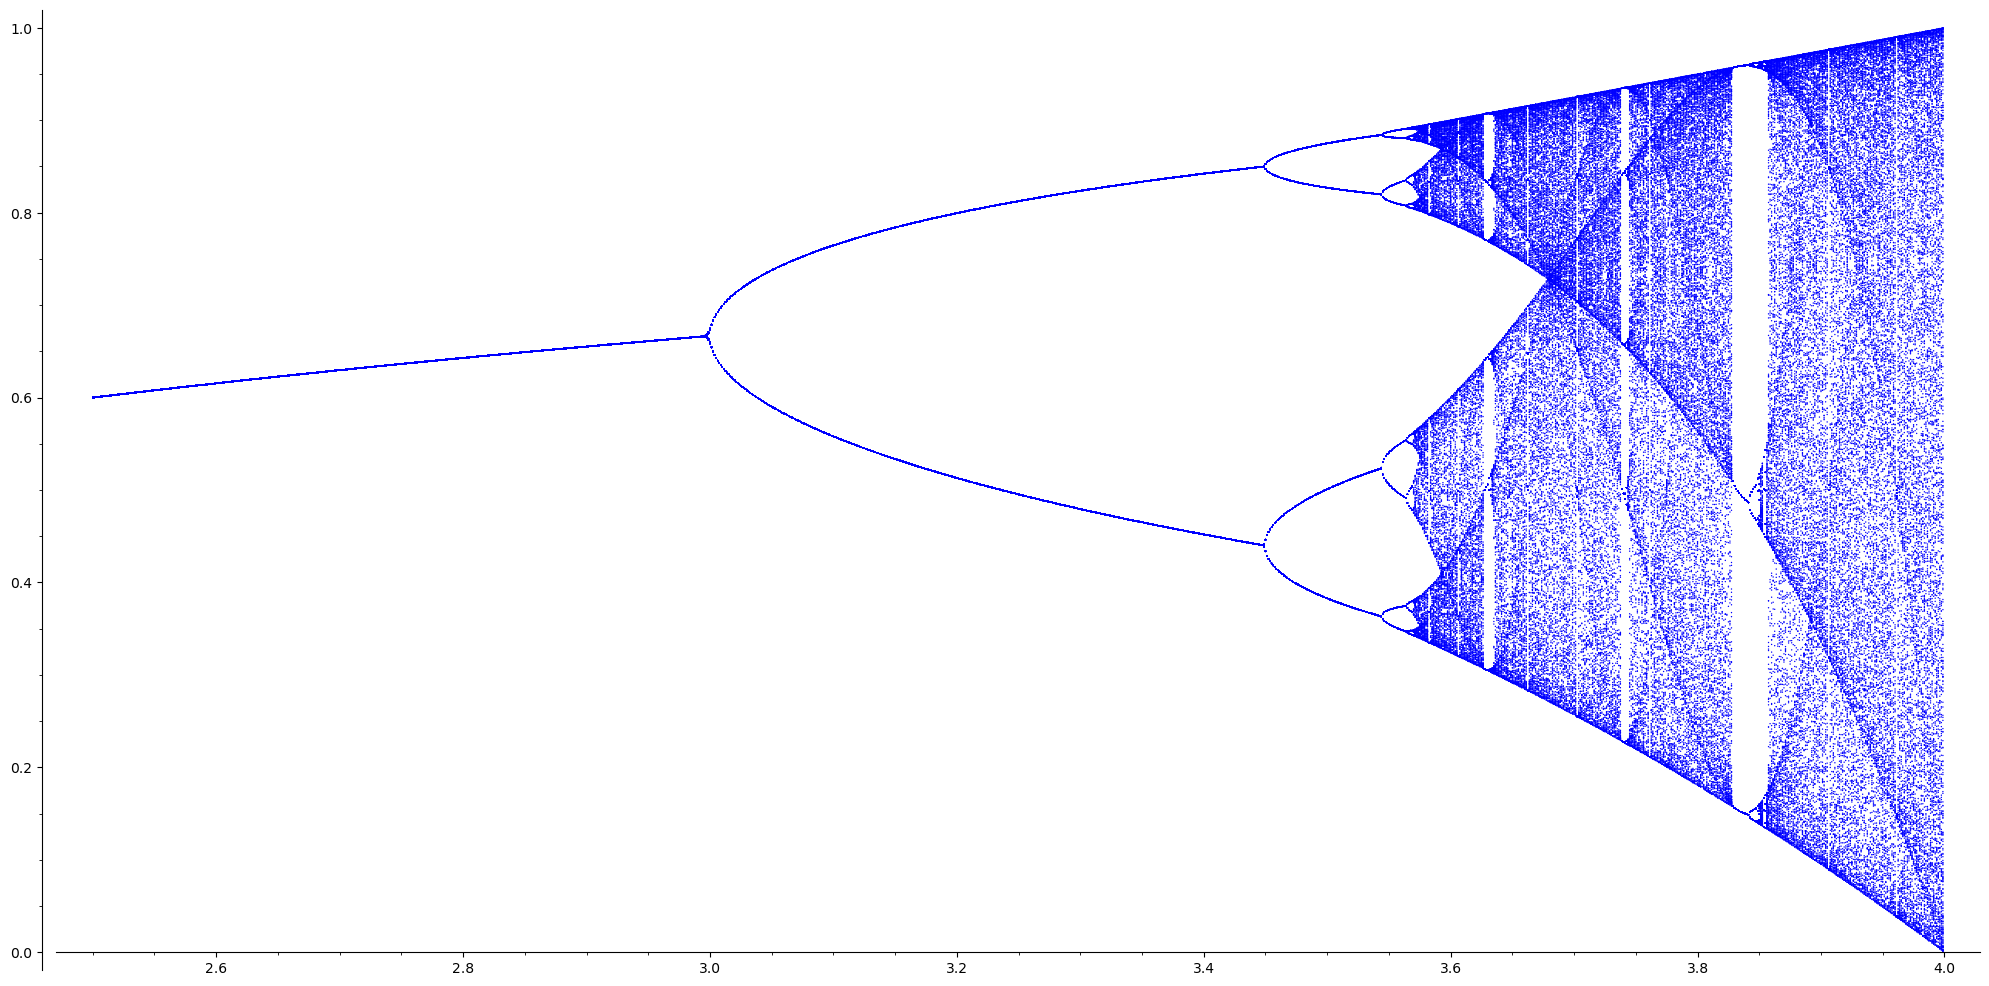

In [8]:
def logistic_bifurcation_interesting():
    pts = [] 
    for r in [0.00125*r for r in range(2000,3200)]: # iterate from 2.5 to 4 with small step size
        attracting = attracting_values(r)
        for p in attracting:
            pts.append((r, p))
    return pts
show(list_plot(logistic_bifurcation_interesting(), size = 1), figsize = [20,10])

-----
# Problem 2

This problem deals with the **stability** and **instability** of fixed points and periodic orbits of iterated quadratic maps. Look at the solution to the last problem from `2-20Problems` which describes the Julia set for $z\mapsto z^2 + c$ when $c = -0.61 + 0.42i$, together with a periodic orbit of order $7$ (i.e. of period 7, $f^7(z) = z$ for each of these seven points. We want to see determine whether this orbit is **stable** or **unstable**. Here is how

1. Use `plot_with_julia(point((_,_), color = 'white'), f)` for various values of coordinates for the point to find a point which is very close to one of the points in the periodic orbit

2. Combine the `plot_iterates` function from `2-20Demo` to produce iterates of this point you found, and the `plot_with_julia` function from `2-20Problems` to plot both this julia set and the iterates of you point you found in the last step. Do the points stabilize to this orbit or tend elsewhere?

3. Can you find an unstable orbit of some order? HINT: This should be very easy - if a periodic point lies on the boundary of the filled Julia set, can you think of nearby points that couldn't possibly tend to a periodic orbit? I.e. you shouldn't have to compute `plot_iterates` to deduce that some orbit is unstable. 

4. Use `julia_plot(interactive=True, mandelbrot = True)` to try to guess values $c$ in the Mandelbrot set where the corresponding dynamical system $z\mapsto z^2 + c$ has a stable periodic orbit of order $n$ for a given integer $n$. Verify this with the `plot_julia_with_periodic_points` function in a few examples that you found. 

## A solution

We will actually solve 1. and 2. in a rather remarkable way, using a remarkable theoretical result: 

>**Fact:** The dynamical system $z \mapsto f_c(z) = z^2 + c$ has at most one stable periodic orbit. Further, if there is a stable periodic orbit, then the starting value $0$ is in the *basin* of this >orbit, i.e. the iterates 
>$$0 \mapsto  f_c(0) \mapsto  f_c^2(0)\mapsto  \cdots \mapsto f_c^n(0)$$
>eventually get arbitrarily close to points in the stable periodic orbit. .

Thus we can solve 1. and 2. by just plotting the iterates of the value 0, and they will tend to a stable periodic orbit. 

In [22]:
# We just copy the functions from the other notebooks. This isn't the "right" way to do this, but it's self contained. 
def iterate(f, n, x):
    if n == 1:
        return (f(x))
    else:
        return(f(iterate(f, n-1, f(x))))
def plot_iterates(f,num_iterates, x, color = 'blue'):
    pts = point((x.real(), x.imag()), color = color)
    for i in range(1, num_iterates):
        new = iterate(f, i, x)
        if abs(new) < 10:
            pts = pts + point((new.real(), new.imag()), color = color)
    return(pts)
import numpy as np
import numpy.polynomial.polynomial as poly
def plot_roots_N(f, color = 'blue'):
    j=np.complex(0,1)
    cs = np.array(R(f).coefficients(sparse=False)) # gets the coefficients of the polynomial f
    roots_candidates = [CDF(a) for a in list(poly.polyroots(cs))]# poly.polyroots finds the roots numerically. CDF makes the sage CDFs
    roots = [a for a in roots_candidates if abs(f(z = a)) < 0.1]
    points = [point((a.real(), a.imag()), color = color) for a in roots ]
    return sum(points)
from PIL import Image as pilimg

def plot_with_julia(graphics, f, **kwds):
    kwdscopy = dict(kwds)
    x_center = kwds.pop("x_center", 0.0)
    y_center = kwds.pop("y_center", 0.0)
    image_width = kwds.pop("image_width", 4.0)
    pixel_count = kwds.pop("pixel_count", 500)
    xmax = x_center + image_width*0.5
    xmin = x_center - image_width*0.5
    ymax = y_center + image_width*0.5
    ymin = y_center - image_width*0.5
    graphics.save("./tmp/g.png", transparent = True, axes=False, xmin=xmin, xmax = xmax, ymin = ymin, ymax = ymax, aspect_ratio = 1, figsize = [10,10])
    julia = julia_plot(f, mandelbrot = False, **kwdscopy)
    julia_modified = julia.pil.convert('RGBA')
    mod = pilimg.open('./tmp/g.png')
    mod_resized = mod.resize((julia.height(), julia.width()))
    julia_modified.alpha_composite(mod_resized)
    return julia_modified

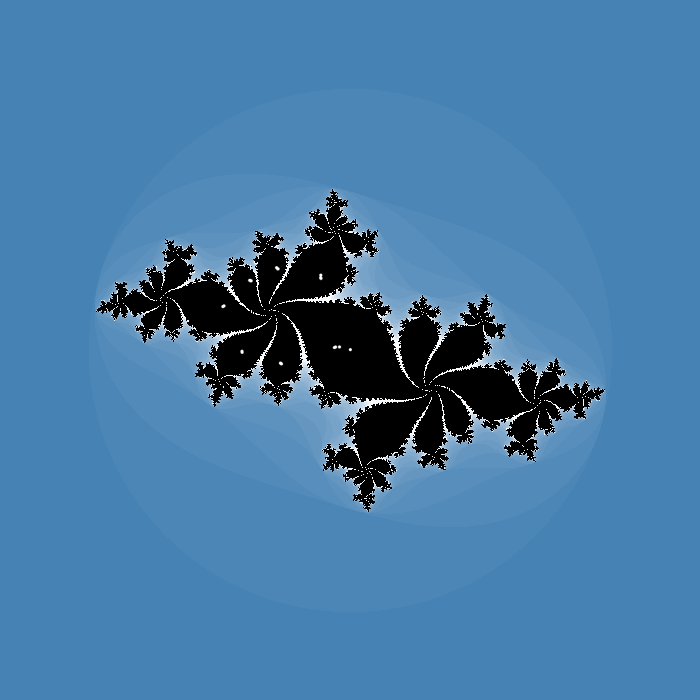

In [23]:
c = -0.61 + 0.42*I
R.<z> = CDF[]
f(z) = z^2 + c
orbit_of_0 = plot_iterates(f, 20, 0, color='white') # the gives the graphic object
a= plot_with_julia(orbit_of_0, f, pixel_count = 700)
#a.save("./tmp/a.png")
a

Notice that we can also add the periodic points of order 7. We will show these in red and the orbit of 0 in white for contrast. 

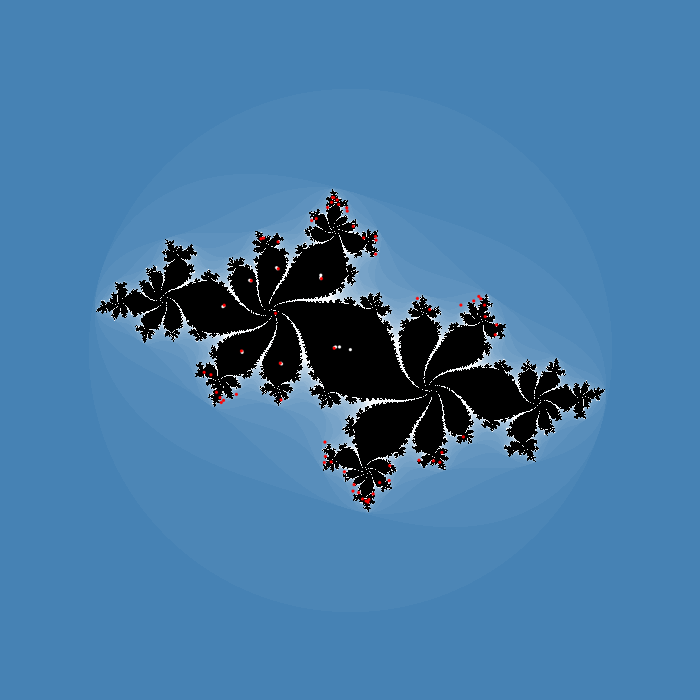

In [25]:
period = 7
iterate_l = lambda g , n: f if n ==1 else g(z = iterate_l(g, n-1))
root_plot = plot_roots_N(R(iterate_l(f, period) - z), color = 'red')
a= plot_with_julia(orbit_of_0 + root_plot, f, pixel_count = 700)
#a.save("./tmp/a2.png")
a

Notice the remarkable fact that the white dots seem to accumulate at the red dots we've found before. Let's try this with a few other values of $c$. 

We'll do the values $c \in \{ -1 + 0.15i, -0.12 + 0.74i , -0.52 + 0.59i \}$ 

### $c = -1 + 0.15i$

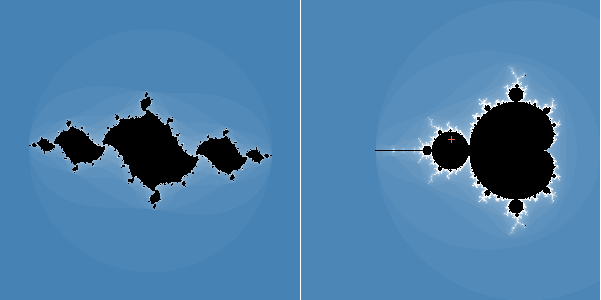

In [29]:
c = -1 + 0.15*I
f(z) = z^2 + c
julia_plot(f, pixel_count = 300) # notice the location in the mandelbrot set of c

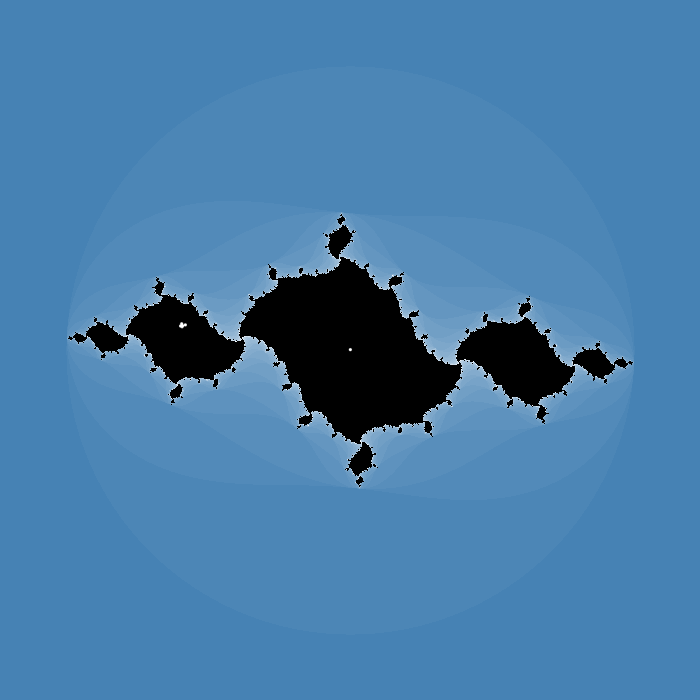

In [28]:
orbit_of_0 = plot_iterates(f, 20, 0, color='white') # the gives the graphic object
a= plot_with_julia(orbit_of_0, f, pixel_count = 700)
a

Here we have plotted the orbit of $0$ under repeated iterations of $f_c$. It seems that it accumulates to two points! Notice how near the "spiky" points of the Julia set there are two petals that come off and a period 2 stable orbit, whereas before the period was 7 and the number of petals was 7? Curious. Let's try to plot 2-periodic points along with the orbit. 

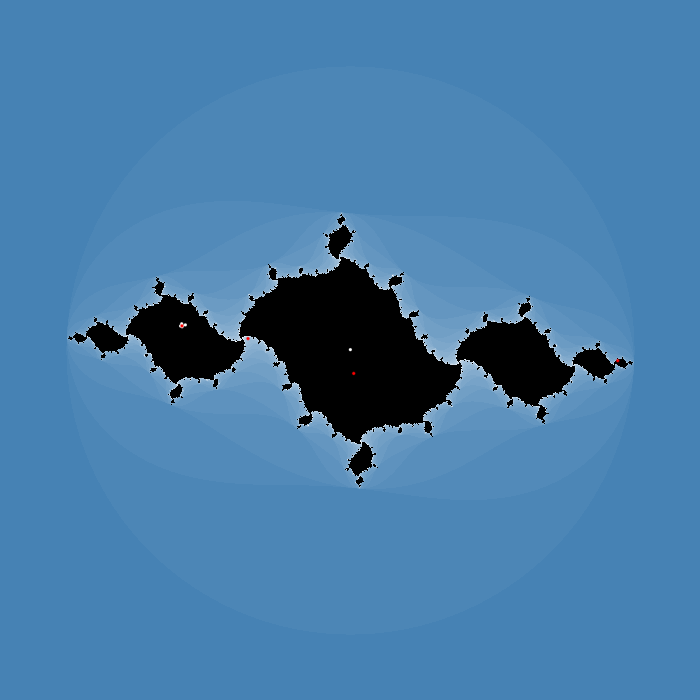

In [30]:
period = 2
root_plot = plot_roots_N(R(iterate_l(f, period) - z), color = 'red')
a= plot_with_julia(orbit_of_0 + root_plot, f, pixel_count = 700)
a

### $c = −0.12+0.74i$

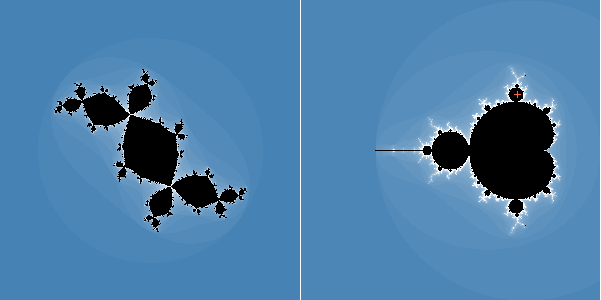

In [31]:
c = -0.12 + 0.74*I
f(z) = z^2 + c
julia_plot(f, pixel_count = 300) # notice the location in the mandelbrot set of c

Now we can already guess the right thing. Let's skip just plotting the orbit of 0. Although we'll actually do a point close to zero or the red and white dots all overlap and the picture is hard to see. 

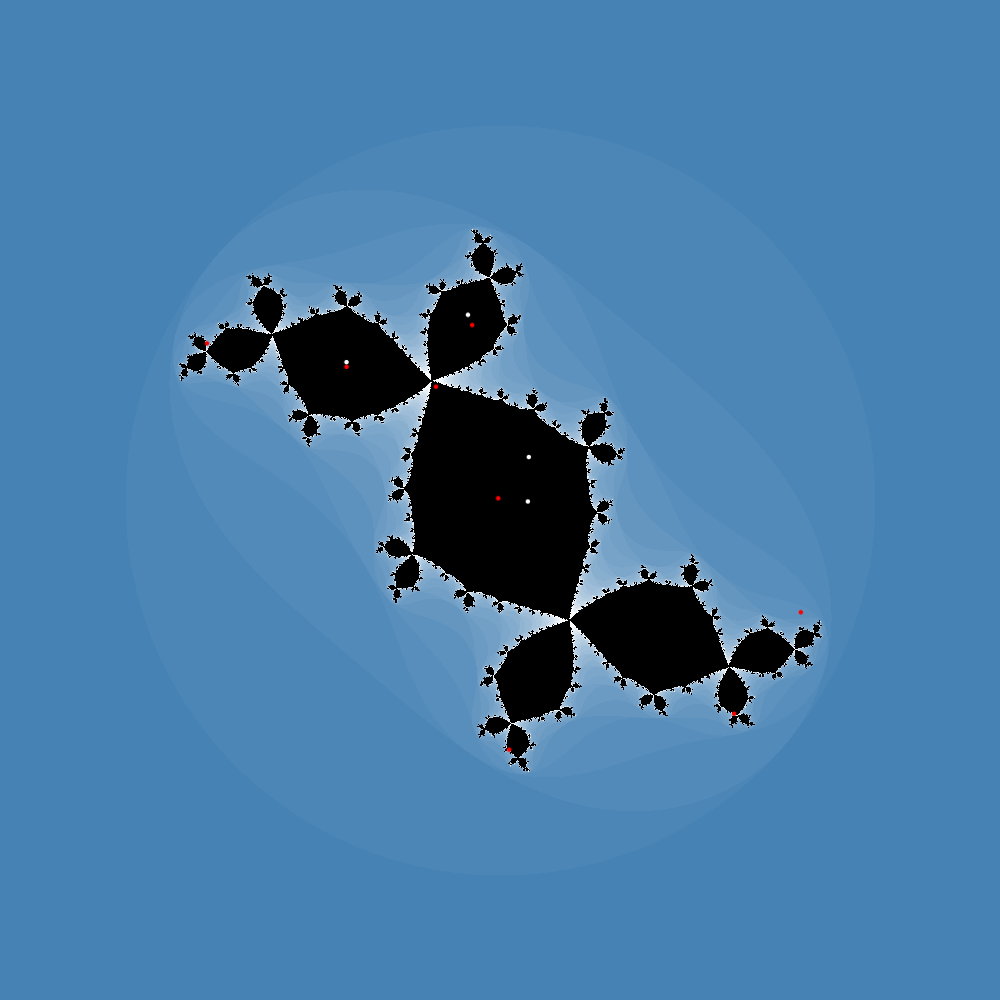

In [45]:
orbit_of_0 = plot_iterates(f, 4, 0.12 + 0.18*I, color='white')
period = 3
root_plot = plot_roots_N(R(iterate_l(f, period) - z), color = 'red')
a= plot_with_julia( root_plot + orbit_of_0, f, pixel_count = 1000)
a

### $c =  −0.52+0.59i$

The story should now be clear so we just mostly show the pictures. 

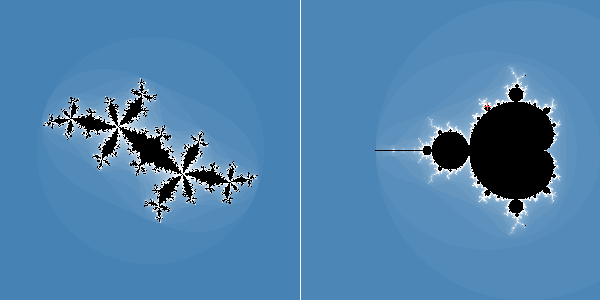

In [46]:
c = -0.52 + 0.59*I
f(z) = z^2 + c
julia_plot(f, pixel_count = 300) 

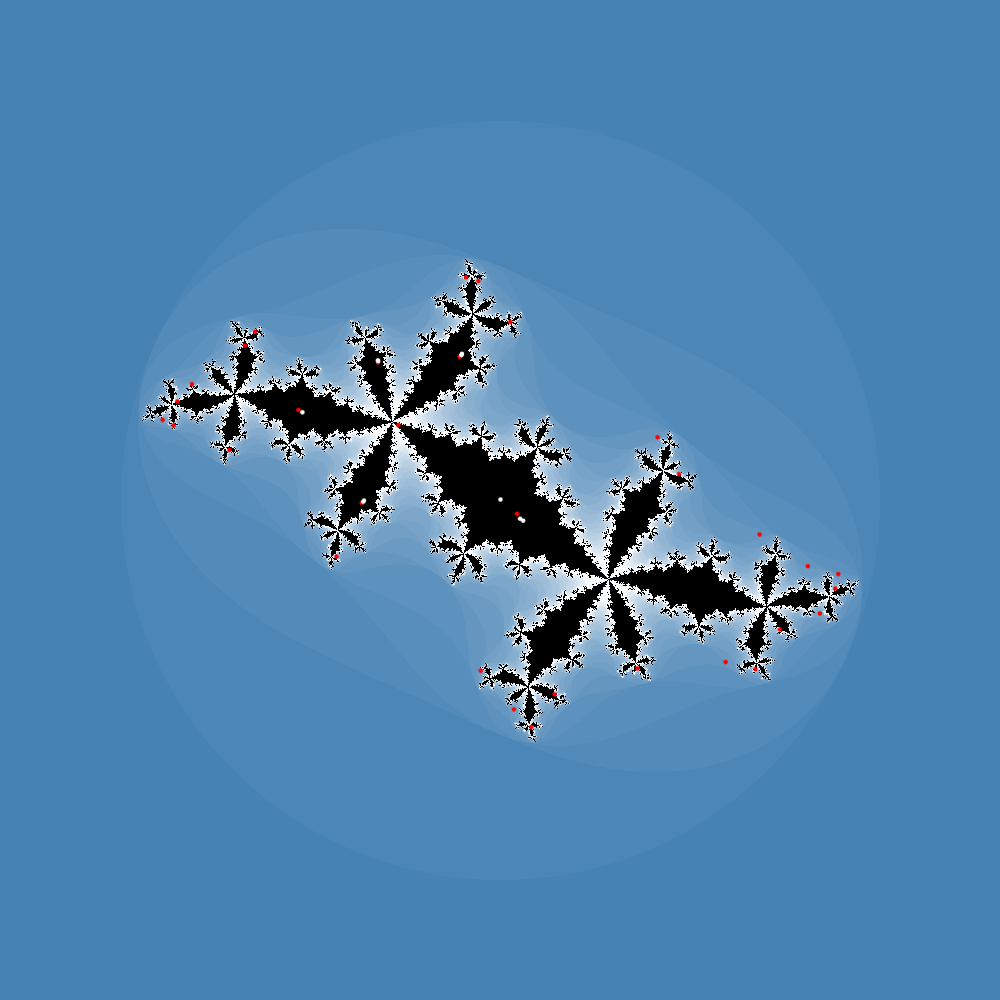

In [47]:
orbit_of_0 = plot_iterates(f, 10, 0, color='white')
period = 5
root_plot = plot_roots_N(R(iterate_l(f, period) - z), color = 'red')
a= plot_with_julia( root_plot + orbit_of_0, f, pixel_count = 1000)
a